In [1]:
%env KERAS_BACKEND = tensorflow

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

In [3]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = 10000)

In [4]:
print("順練總筆數:",len(x_train))
print("測試總筆數:",len(x_test))

順練總筆數: 25000
測試總筆數: 25000


In [5]:
x_train = sequence.pad_sequences(x_train,maxlen=150) #弄成相同長度
x_test = sequence.pad_sequences(x_test,maxlen=150)

In [6]:
x_train.shape

(25000, 150)

# 建立上課的原始模型

In [8]:
N = 3 #文字壓縮到N維
K = 4 #LSTM層K個神經元
model = Sequential()
model.add(Embedding(10000,N)) #壓縮成N維
model.add(LSTM(K)) #輸入就是前面的輸出 keras會自己決定
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #寫RNN時 要注意輸入的資料
model.summary()
model1 = model.fit(x_train,y_train,batch_size =32,epochs = 2)

Epoch 1/2
25000/25000 [==============================] - 176s 7ms/step - loss: 0.5182 - acc: 0.7475
Epoch 2/2
25000/25000 [==============================] - 167s 7ms/step - loss: 0.2997 - acc: 0.8830


# 建立自己的模型

嘗試加入dropout來避開overfitting

In [9]:
from keras.layers import Dropout

In [11]:
N = 3 #文字壓縮到N維
K = 4 #LSTM層K個神經元
model = Sequential()
model.add(Embedding(10000,N)) #壓縮成N維
model.add(Dropout(0.4)) #插入40%的dropout
model.add(LSTM(K)) #輸入就是前面的輸出 keras會自己決定
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #寫RNN時 要注意輸入的資料
model.summary()
model2 = model.fit(x_train,y_train,batch_size =32,epochs = 2)

Epoch 1/2
25000/25000 [==============================] - 179s 7ms/step - loss: 0.5597 - acc: 0.7244
Epoch 2/2
25000/25000 [==============================] - 176s 7ms/step - loss: 0.3587 - acc: 0.8606


顯然沒有比較好

# 增加K、N值

In [12]:
N = 10 #文字壓縮到N維
K = 10 #LSTM層K個神經元
model = Sequential()
model.add(Embedding(10000,N)) #壓縮成N維
model.add(LSTM(K)) #輸入就是前面的輸出 keras會自己決定
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #寫RNN時 要注意輸入的資料
model.summary()
model3 = model.fit(x_train,y_train,batch_size =32,epochs = 2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 10)          100000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 100,851
Trainable params: 100,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
25000/25000 [==============================] - 166s 7ms/step - loss: 0.4333 - acc: 0.7939
Epoch 2/2
25000/25000 [==============================] - 166s 7ms/step - loss: 0.2510 - acc: 0.9030


N從3 >> 10

K 從 4>> 10

準確度上升2%

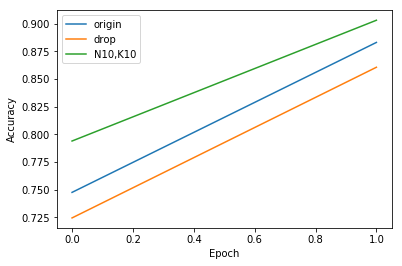

In [14]:
plt.plot(model1.history["acc"])
plt.plot(model2.history["acc"])
plt.plot(model3.history["acc"])

plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["origin","drop","N10,K10"], loc="best")
plt.show()